## Import Libraries

In [124]:
# import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category= UserWarning)
%matplotlib inline

## Load the dataset
**note: we are going to call the dataset "health"**

In [6]:
health = pd.read_csv(r"C:\Users\USER\Downloads\archive (18)\healthcare-dataset-stroke-data.csv")
health

health.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


### Get familiar with the dataset


In [7]:
# Check the data types
health.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
# Check the number of rows and columns
health.shape

(5110, 12)

In [9]:
mean_gender = health['gender'].value_counts().mean()


In [10]:
health.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
# Check the summary statistics
health.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
health.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
# remove all duplicated values

health.duplicated().sum()

0

## Clean the Data 

### There are two options for handling missing values in the dataset:

**1. Fill missing values in the 'bmi' column with the mean value.**

**2. Drop all rows with any missing values entirely**

### I will be working with the dataset where all rows with null values have been dropped, and I will refer to this new dataset as 'health_drop'

In [4]:
# To avoid any mix-up, I will re-import the dataset and drop all rows with missing values
health_drop = pd.read_csv(r"C:\Users\USER\Downloads\archive (18)\healthcare-dataset-stroke-data.csv")
health_drop.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
health_drop.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [17]:
# Drop all missing values 
health_drop = health_drop.dropna()
health_drop 
health_drop.isnull().sum()
health_drop.shape


(4909, 12)

In [18]:
# remove all duplicated values

health_drop.duplicated().sum()

0

In [19]:
# Convert 'hypertension' column to "Yes" for 1 and "No" for 0
health_drop['hypertension'] = health_drop['hypertension'].map({1: 'Yes', 0: 'No'})
health_drop.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,No,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,No,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [20]:
# convert 'age' from float to integer
health_drop['age'] = health_drop['age'].astype(int)
health_drop['age'].dtype


dtype('int32')

In [21]:
health_drop.dtypes

id                     int64
gender                object
age                    int32
hypertension          object
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## Data Exploration(EDA)

In [144]:
# how many patient have stroke?  ans = 209 
stroke_count = health_drop['stroke'].value_counts()
stroke_count

stroke
0    4861
1     249
Name: count, dtype: int64

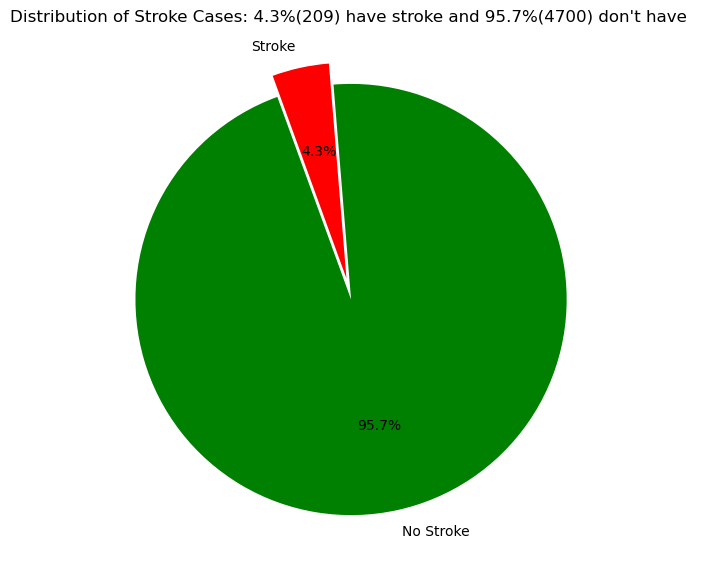

In [22]:
# Data for the pie chart
stroke_count = [4700, 209]
labels = ['No Stroke', 'Stroke']
colors = ['green', 'red'] 
plt.figure(figsize=(7, 7))
plt.pie(stroke_count, labels=labels, autopct='%1.1f%%', startangle=110, colors=colors, explode=[0, 0.1])
plt.title("Distribution of Stroke Cases: 4.3%(209) have stroke and 95.7%(4700) don't have ")
plt.show();

In [23]:
health_drop.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,No,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80,No,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,No,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,Yes,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81,No,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [25]:
# how many patient have stroke?  ans = 209 
stroke_count = health_drop['stroke'].value_counts()
stroke_count


stroke
0    4700
1     209
Name: count, dtype: int64

## Note: In this analysis, red represents cases with stroke, while green represents cases without stroke

#### <u>Question 1: What's the relationship between marriage and stroke?</u>
**1. By examining the proportion of stroke cases by marital status, we observe an increase in the stroke rate among individuals who have been married at least once**

**2. A direct count of stroke cases also shows a similar trend, but it may not be as accurate, given that the dataset contains a larger number of married people.**

In [78]:
# count the number of people who are either married or unmarried
health_drop['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [79]:
# Since there are more married people in the dataset, we will calculate the stroke rate based on each category of marriage.
ever_married_stroke_rate = health_drop.groupby('ever_married')['stroke'].mean()
ever_married_stroke_rate

ever_married
No     0.016505
Yes    0.065613
Name: stroke, dtype: float64

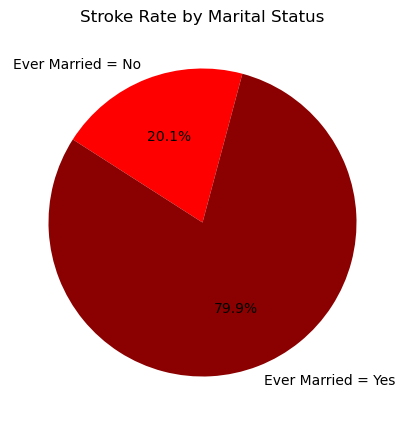

In [111]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(ever_married_stroke_rate, labels= ['Ever Married = No', 'Ever Married = Yes'], 
        autopct='%1.1f%%', startangle=75, colors = ['#FF0000','#8B0000'], explode=[0, 0.0])
plt.title('Stroke Rate by Marital Status')
plt.show();

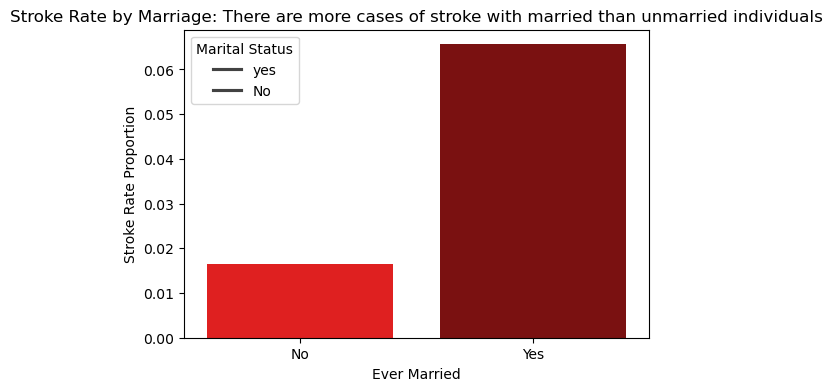

In [145]:
#Relationship between Ever married and stroke 
plt.figure(figsize=(6, 4))
sns.barplot(x=ever_married_stroke_rate.index,y=ever_married_stroke_rate.values, palette = ['#FF0000','#8B0000'])
plt.title('Stroke Rate by Marriage: There are more cases of stroke with married than unmarried individuals')
plt.xlabel('Ever Married')
plt.ylabel('Stroke Rate Proportion')
plt.show()

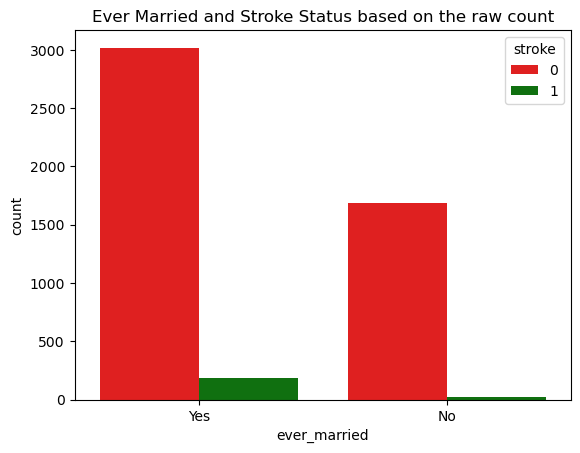

In [30]:
# A direct count of stroke cases also shows a similar trend, but it may not be as accurate
#given that the dataset contains a larger number of married people. 
sns.countplot(data= health_drop, x='ever_married', palette=['red', 'green'], hue='stroke')
plt.title('Ever Married and Stroke Status based on the raw count')
plt.show();

#### <u>Question 2: What's the relationship between gender and stroke?</u>
**1. By examining the proportion of stroke cases by gender, we observe an increase in the stroke rate in MALE than in FEMALE**

**2. A direct count of stroke cases dont show a similar trend because the dataset contains a larger number of FEMALE than MALE.**

In [31]:
# count the number of stroke cases for male and female
health_drop['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [83]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 
gender_stroke_rate = health_drop.groupby('gender')['stroke'].mean()
gender_stroke_rate

gender
Female    0.047094
Male      0.051064
Other     0.000000
Name: stroke, dtype: float64

In [84]:
stroke_count_by_gender = gender_stroke_rate *health_drop['gender'].value_counts()
stroke_count_by_gender 

gender
Female    141.0
Male      108.0
Other       0.0
dtype: float64

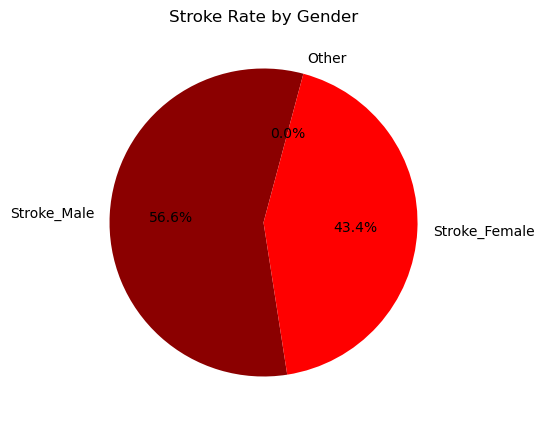

In [146]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(stroke_count_by_gender,labels= ['Stroke_Male','Stroke_Female','Other'], 
        autopct='%1.1f%%', startangle=75, colors = ['#8B0000','#FF0000','#FFC0C0'], explode=[0,0.0,0.0])
plt.title('Stroke Rate by Gender')
plt.show();

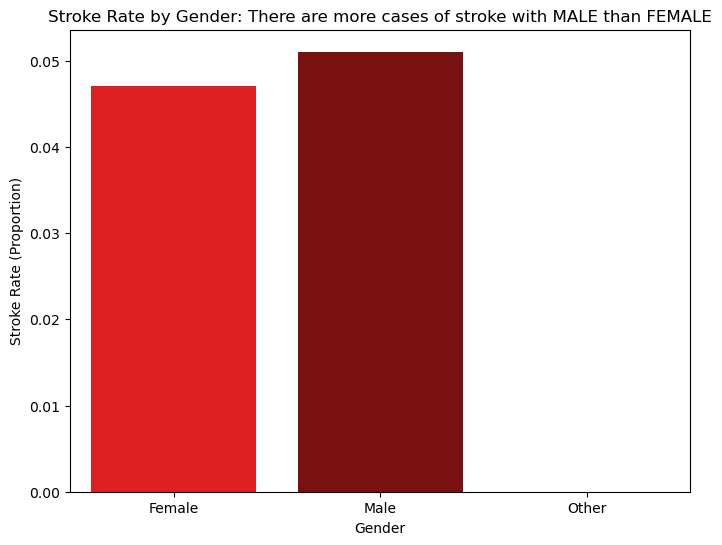

In [125]:
# Relationship between gender and stroke 
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_stroke_rate.index,y=gender_stroke_rate.values,palette = ['#FF0000','#8B0000'])
plt.title('Stroke Rate by Gender: There are more cases of stroke with MALE than FEMALE')
plt.xlabel('Gender')
plt.ylabel('Stroke Rate (Proportion)')
plt.show()

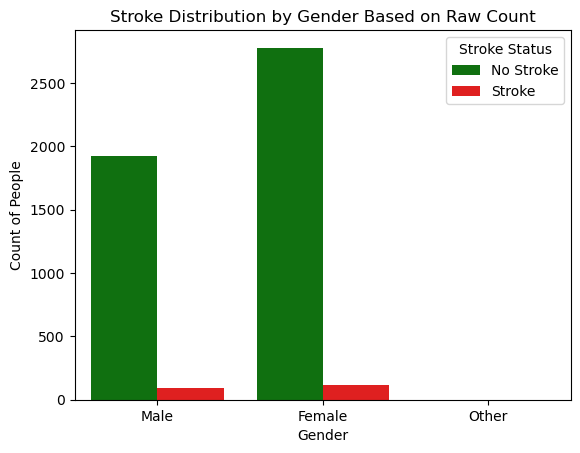

In [35]:
# A direct count of stroke cases also shows a similar trend, but it may not be as accurate
#given that the dataset contains a larger number of married people.
sns.countplot(data = health_drop, x='gender', hue='stroke', palette=['green', 'red'])
plt.title('Stroke Distribution by Gender Based on Raw Count')
plt.xlabel('Gender')
plt.ylabel('Count of People')
plt.legend(title='Stroke Status', labels=['No Stroke', 'Stroke'])
plt.show()

### <u>Question 3: Is age a risk factor for stroke?</u>

**Yes, Stroke cases are observed starting from age 40 and are most common among patients over 75 years old**

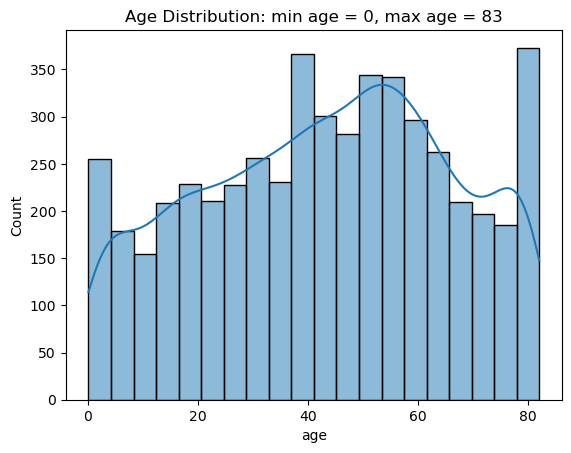

In [142]:
# Lets check the age distribution
sns.histplot(health_drop['age'], kde = True)
plt.title('Age Distribution: min age = 0, max age = 83')
plt.xlabel('age')

plt.show();

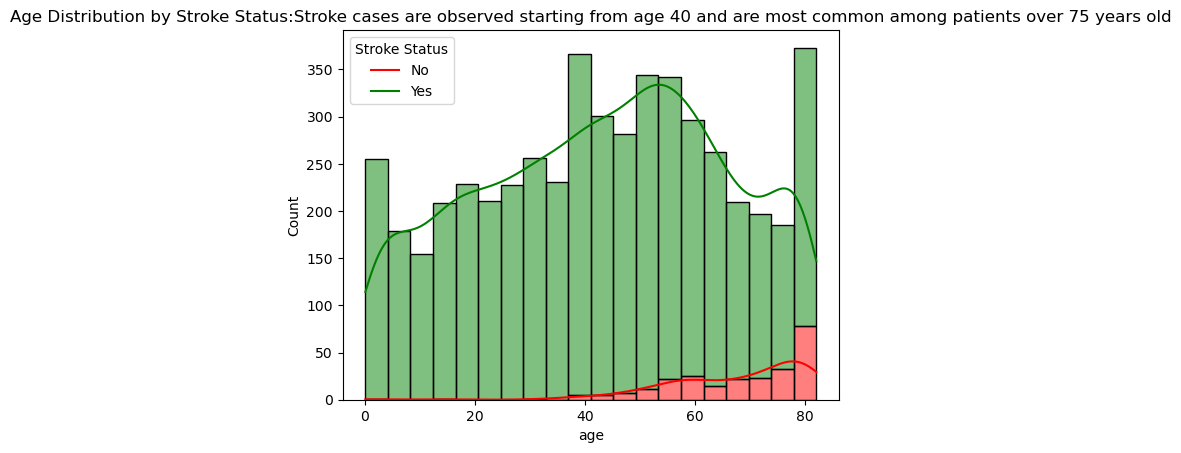

In [143]:
# Relationship between age and stroke
sns.histplot(health_drop, x = 'age',  hue='stroke', multiple='stack', palette=['green', 'red'], kde=True)
plt.title('Age Distribution by Stroke Status:Stroke cases are observed starting from age 40 and are most common among patients over 75 years old')
plt.legend(title='Stroke Status', labels=['No', 'Yes'])
plt.show();

In [45]:
# Create age groups
health_drop['age_group'] = pd.cut(health_drop['age'], bins=[0, 40, 60, 80, 100], labels=['<40', '40-60', '60-80', '80+'])
health_drop['age_group']

0       60-80
1       60-80
2       60-80
3       40-60
4       60-80
        ...  
5105    60-80
5106      80+
5107      <40
5108    40-60
5109    40-60
Name: age_group, Length: 5110, dtype: category
Categories (4, object): ['<40' < '40-60' < '60-80' < '80+']

In [137]:
# Calculate stroke rate by age group and gender
age_stroke_rate = health_drop.groupby('age_group')['stroke'].mean()
age_stroke_rate


age_group
<40      0.003565
40-60    0.040973
60-80    0.129630
80+      0.198276
Name: stroke, dtype: float64

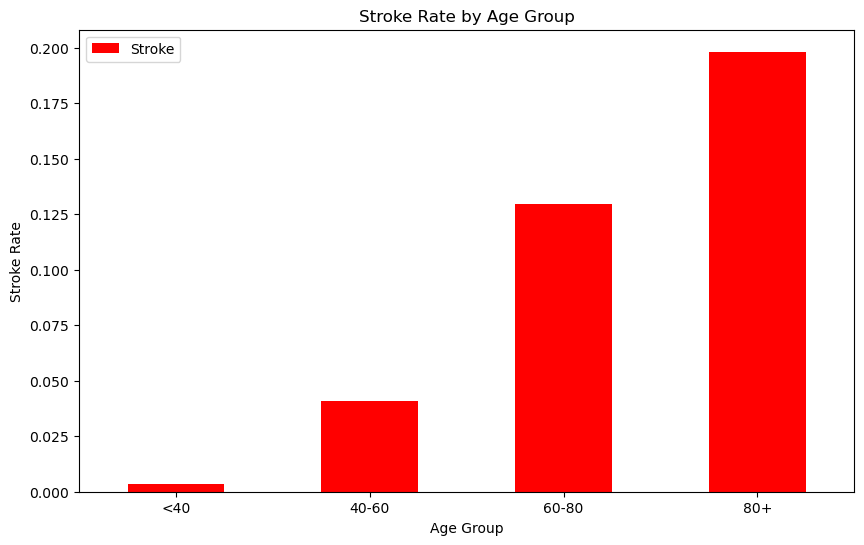

In [141]:
# Plot the stroke rate by age group and gender
plt.figure(figsize=(10, 6))
age_stroke_rate.plot(kind='bar', stacked=True, color = 'red')
plt.title('Stroke Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stroke Rate')
plt.xticks(rotation=0)
plt.legend([ 'Stroke'])
plt.show();

 ### Conclusion: By analyzing age, gender, and stroke together
    
**1. Age is a significant risk factor, with the stroke rate increasing in older age groups**
    
**2. Gender show differences in stroke incidence, with males more likely to have stroke than female.**
    
**3. Age and Gender Combined shows that older males are at a higher risk of stroke than older females.**
   

#### <u>Question 4: What's the relationship between Hypertension and Stroke?</u>
**1. By examining the proportion of stroke cases by hypertension status, we observe a higher stroke rate among individuals with a history of 
hypertension or who have hypertension when compared to those without hypertension**

**2. A direct count of stroke cases also shows a similar trend, but it may not be as accurate, given that the dataset contains a larger number of people without hypertension.**

In [106]:
# Whats the relationship between age, hypertention, and stroke
health_drop['hypertension'].value_counts()

hypertension
0    4612
1     498
Name: count, dtype: int64

In [107]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 
stroke_rate_hypertension = health_drop.groupby('hypertension')['stroke'].mean()
stroke_rate_hypertension

hypertension
0    0.039679
1    0.132530
Name: stroke, dtype: float64

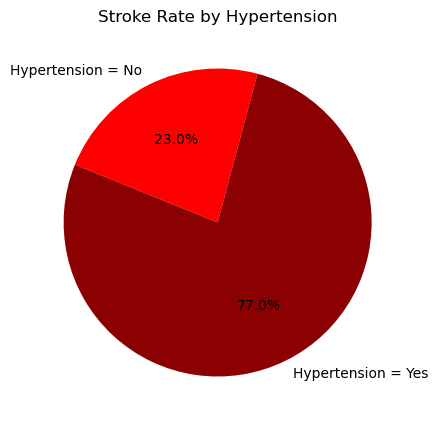

In [152]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(stroke_rate_hypertension, labels= ['Hypertension = No','Hypertension = Yes'],
        autopct='%1.1f%%', startangle=75, colors = ['#FF0000','#8B0000'], explode=[0,0.0])
plt.title('Stroke Rate by Hypertension')
plt.show();

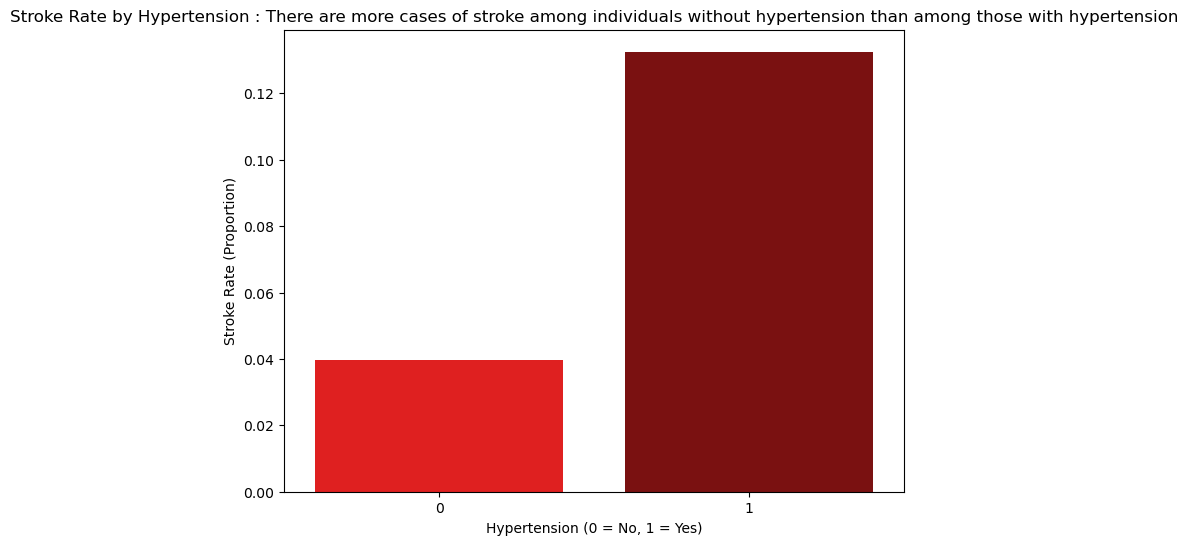

In [148]:
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_rate_hypertension.index, y=stroke_rate_hypertension.values, palette =['#FF0000','#8B0000'])
plt.title('Stroke Rate by Hypertension : There are more cases of stroke among individuals without hypertension than among those with hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Stroke Rate (Proportion)')
plt.show()

### <u>Can heart disease increase the rate of stroke?</u>
**1. Yes, by examining the proportion of stroke cases by heart disease, we observe a higher stroke rate among individuals with heart disease**

**2. A direct count of stroke cases per heart disease dont show a similar trend because the dataset contains a larger number individuals without heart disease.**

In [101]:
# count the number of stroke cases for male and female
health_drop['heart_disease'].value_counts()

heart_disease
0    4834
1     276
Name: count, dtype: int64

In [102]:
# Since there are more female individual in the dataset, we will calculate the stroke rate based on gender. 
stroke_rate_disease = health_drop.groupby('heart_disease')['stroke'].mean()
stroke_rate_disease

heart_disease
0    0.041787
1    0.170290
Name: stroke, dtype: float64

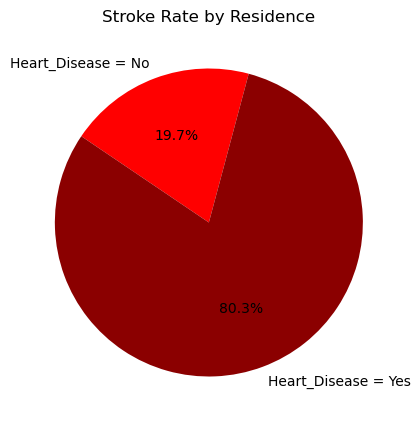

In [153]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(stroke_rate_disease, labels= ['Heart_Disease = No','Heart_Disease = Yes'], 
        autopct='%1.1f%%', startangle=75, colors = ['#FF0000','#8B0000'], explode=[0,0.0])
plt.title('Stroke Rate by Residence')
plt.show();

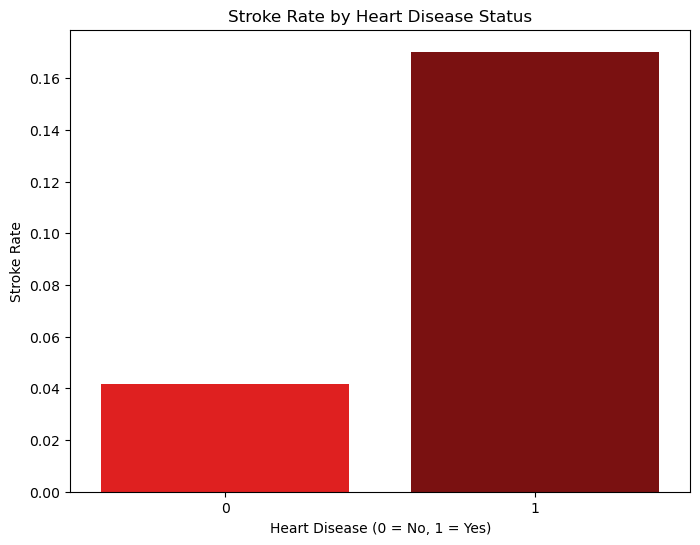

In [129]:
# Plot stroke rate by heart disease status
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_rate_disease.index, y=stroke_rate_disease.values, palette =['#FF0000','#8B0000'])
plt.title('Stroke Rate by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Stroke Rate')
plt.show()

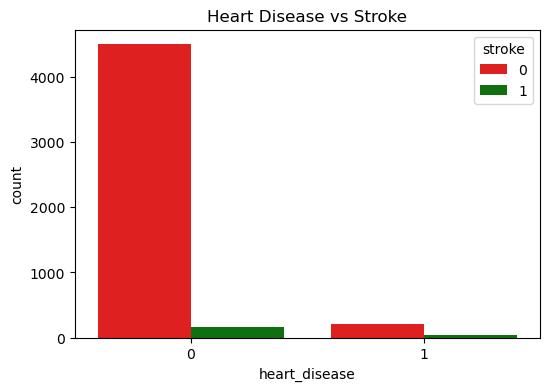

In [49]:
# Heart Disease vs Stroke
plt.figure(figsize=(6, 4))
sns.countplot(data= health_drop, x='heart_disease', palette = ['red', 'green'], hue = 'stroke')
plt.title("Heart Disease vs Stroke")
plt.show()

### <u>Can smoking increase the rate of stroke?<u/>
**1. Yes, by examining the proportion of stroke cases by smoking status, we observe that individuals who formerly smoked have the highest stroke rate, followed by those who currently smoke. In contrast, those who have never smoked have a lower risk of stroke compared to those who currently or formerly smoked**

**2. A direct count of stroke cases per smoke status dont show a similar trend because the dataset contains a larger number individuals who never smoked**

In [154]:
# lets check the count of smoking status from the raw dataset

health_drop['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [7]:
# Since there are more individuals who have never smoked in the dataset,
# we will calculate the stroke rate as an average across each smoking category to account for this imbalance 

stroke_rate_smoking = health_drop.groupby('smoking_status')['stroke'].mean()
stroke_rate_smoking

smoking_status
Unknown            0.030440
formerly smoked    0.079096
never smoked       0.047569
smokes             0.053232
Name: stroke, dtype: float64

In [8]:
smoking_status_data = {
    'smoking_status': ['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
    'stroke_rate': [0.019555, 0.068100, 0.045356, 0.052917]}
smoking_status_data

{'smoking_status': ['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
 'stroke_rate': [0.019555, 0.0681, 0.045356, 0.052917]}

In [13]:
# Create a DataFrame 
smoking_group = pd.DataFrame(smoking_status_data)
smoking_group

,smoking_status,stroke_rate
0,Unknown,0.019555
1,formerly smoked,0.068100
2,never smoked,0.045356
3,smokes,0.052917


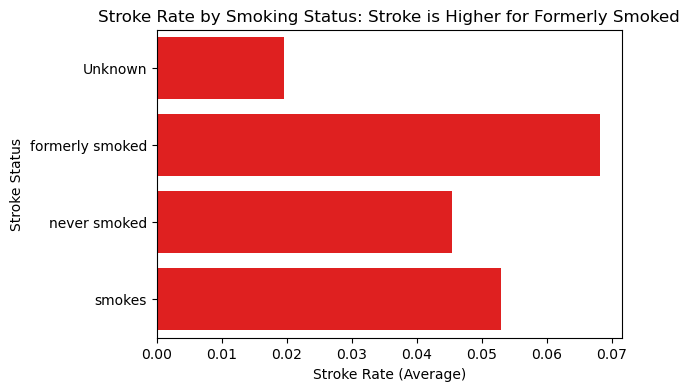

In [22]:
# Plotting the data
plt.figure(figsize=(6, 4))
sns.barplot(data=smoking_group, y='smoking_status', x='stroke_rate', color = 'red')
plt.title('Stroke Rate by Smoking Status: Stroke is Higher for Formerly Smoked')
plt.xlabel('Stroke Rate (Average)')
plt.ylabel('Stroke Status')
plt.show()


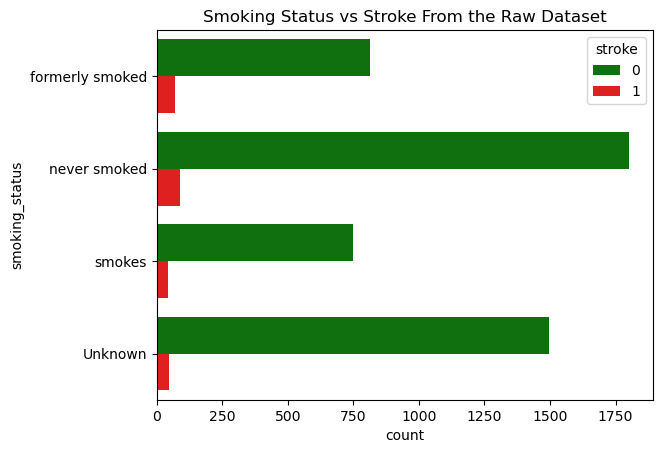

In [21]:
# A direct count of stroke cases per smoke status dont show a similar trend because the dataset contains a larger number of
# individuals without heart disease

sns.countplot(data= health_drop, y='smoking_status', palette = ['green', 'red'], hue='stroke')
plt.title("Smoking Status vs Stroke From the Raw Dataset")
plt.show()

### <u>Can Work Type affect the rate of stroke?<u/>
**1. Yes, by examining the proportion of stroke cases by work type, we observe that individuals who are self employed have highest stroke rate, followed by those who are in the public or private sector. In contrast, those who have never worked and children are at a lower risk**

**2. A direct count of stroke cases per work type dont show a similar trend because the dataset contains a larger number individuals work in the private sector.**

In [31]:
# lets check the count of work type from the raw dataset
health_drop['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [30]:
# Since there are more individuals who work in the private sector in the dataset,
# we will calculate the stroke rate as an average across each work type category to account for this imbalance 
 
stroke_rate_work = health_drop.groupby('work_type')['stroke'].mean()
stroke_rate_work

work_type
Govt_job         0.050228
Never_worked     0.000000
Private          0.050940
Self-employed    0.079365
children         0.002911
Name: stroke, dtype: float64

In [32]:
work_type = {
    'work_type': ['Govt_job', 'Never_worked', 'Private', 'Self-employed ','children'],
    'stroke_rate': [0.050228, 0.000000, 0.050940, 0.079365,0.002911 ]}
work_type

{'work_type': ['Govt_job',
  'Never_worked',
  'Private',
  'Self-employed ',
  'children'],
 'stroke_rate': [0.050228, 0.0, 0.05094, 0.079365, 0.002911]}

In [33]:
#Create a Date Frame
stroke_work = pd.DataFrame(work_type)
stroke_work

,work_type,stroke_rate
0,Govt_job,0.050228
1,Never_worked,0.000000
2,Private,0.050940
3,Self-employed,0.079365
4,children,0.002911


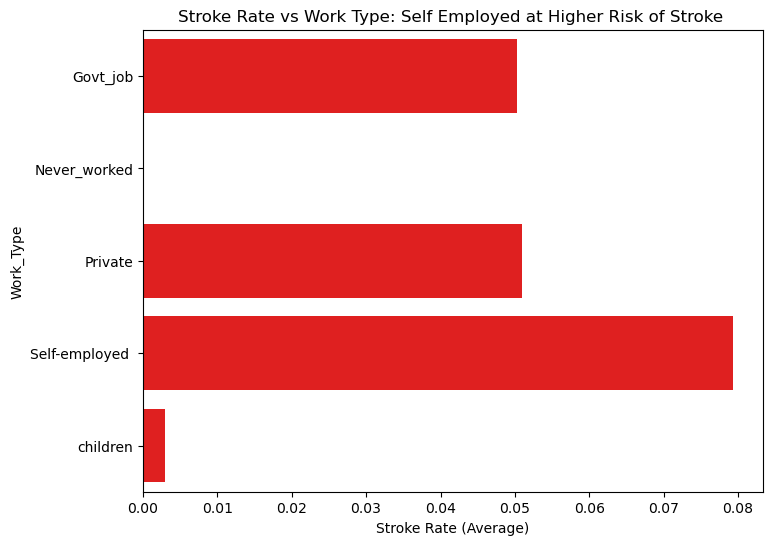

In [35]:
# Plotting the data
plt.figure(figsize=(8, 6))
sns.barplot(data= stroke_work, y='work_type', x='stroke_rate', color = 'red')
plt.title('Stroke Rate vs Work Type: Self Employed at Higher Risk of Stroke ')
plt.xlabel('Stroke Rate (Average)')
plt.ylabel('Work_Type')
plt.show()

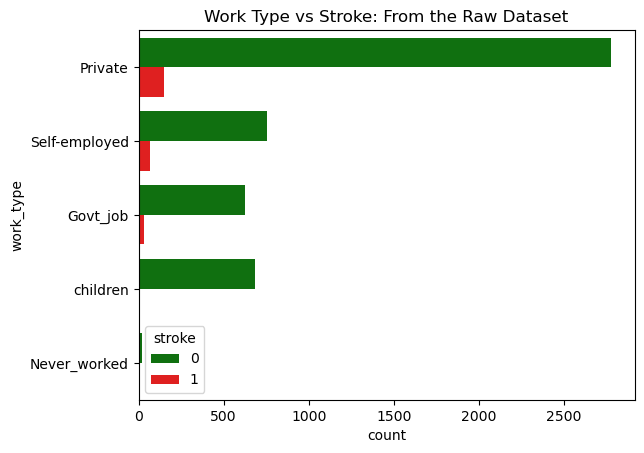

In [36]:
# A direct count of stroke cases per work type dont show a similar trend because the dataset contains a larger number of
# individuals in the private sector

sns.countplot(data= health_drop, y='work_type', palette = ['green', 'red'], hue='stroke')
plt.title("Work Type vs Stroke: From the Raw Dataset")
plt.show()

### <u>Can Individua Residence affect the rate of stroke?<u/>
**1. Yes, by examining the proportion of stroke cases by work type, we observe that individuals who are self employed have highest stroke rate, followed by those who are in the public or private sector. In contrast, those who have never worked and children a lower risk**

**2. A direct count of stroke cases per work type dont show a similar trend because the dataset contains a larger number individuals work in the private sector.**

In [58]:
# lets check the count of residence type from the raw dataset
health_drop['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [59]:
# Since there are more individuals who live in the urban areas in the dataset,
# we will calculate the stroke rate as an average across each Residence_type to account for this imbalance 
 
stroke_rate_residence = health_drop.groupby('Residence_type')['stroke'].mean()
stroke_rate_residence

Residence_type
Rural    0.045346
Urban    0.052003
Name: stroke, dtype: float64

<Figure size 600x400 with 0 Axes>

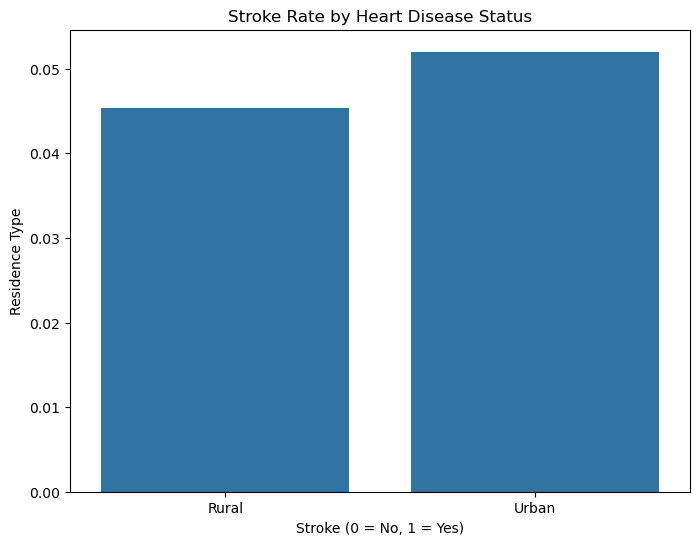

In [61]:
# Plot stroke rate by heart disease status
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_rate_residence.index, y=stroke_rate_residence.values, )
plt.title('Stroke Rate by Heart Disease Status')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Residence Type')
plt.show()

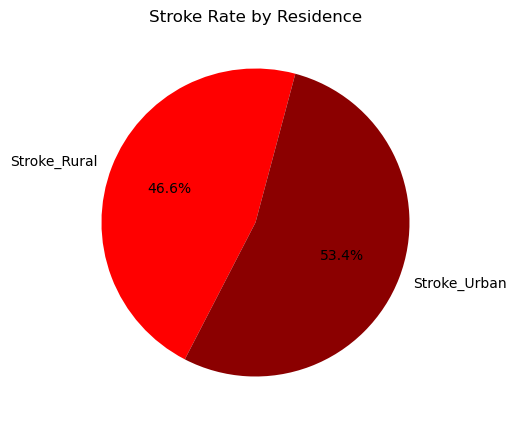

In [76]:
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(stroke_rate_residence, labels= ['Stroke_Rural', 'Stroke_Urban'], 
        autopct='%1.1f%%', startangle=75, colors = ['#FF0000','#8B0000'], explode=[0, 0.0])
plt.title('Stroke Rate by Residence')
plt.show();

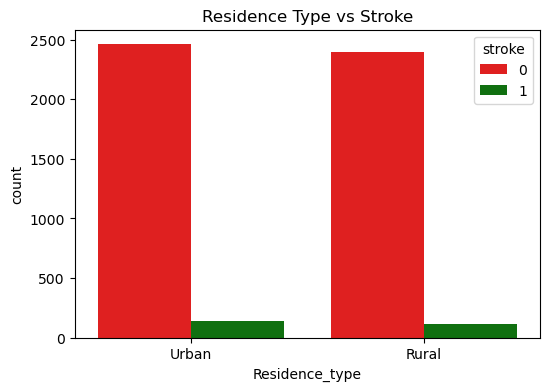

In [62]:
# Heart Disease vs Stroke
plt.figure(figsize=(6, 4))
sns.countplot(data= health_drop, x='Residence_type', palette = ['red', 'green'], hue = 'stroke')
plt.title("Residence Type vs Stroke")
plt.show()

In [51]:
mean_age = health_drop['age'].mean()
mean_age

43.226614481409

In [38]:
mean_glucose = health_drop['avg_glucose_level'].mean()
mean_glucose

106.1476771037182

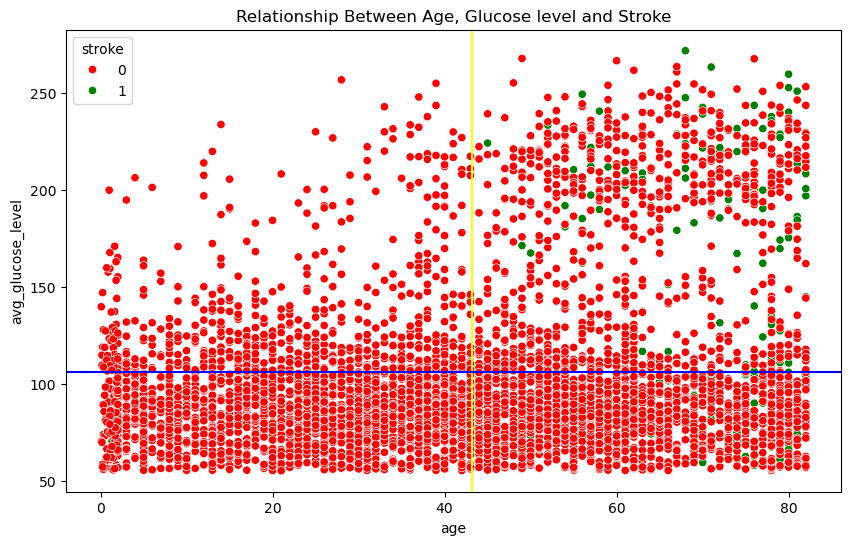

In [53]:
# Dose glucose level increase or decrease stroke 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='avg_glucose_level', palette = ['red','green'], hue = 'stroke', data=health_drop)
plt.axvline(mean_age, color='yellow', linestyle='-', label=f'Mean Age: {mean_age:.2f}')
plt.axhline(mean_glucose, color='blue', linestyle='-', label=f'Mean Glucose: {mean_glucose:.2f}')
plt.title('Relationship Between Age, Glucose level and Stroke')
plt.show()


In [54]:
mean_bmi = health_drop['bmi'].mean()
mean_bmi

28.893236911794666

<Figure size 1000x600 with 0 Axes>

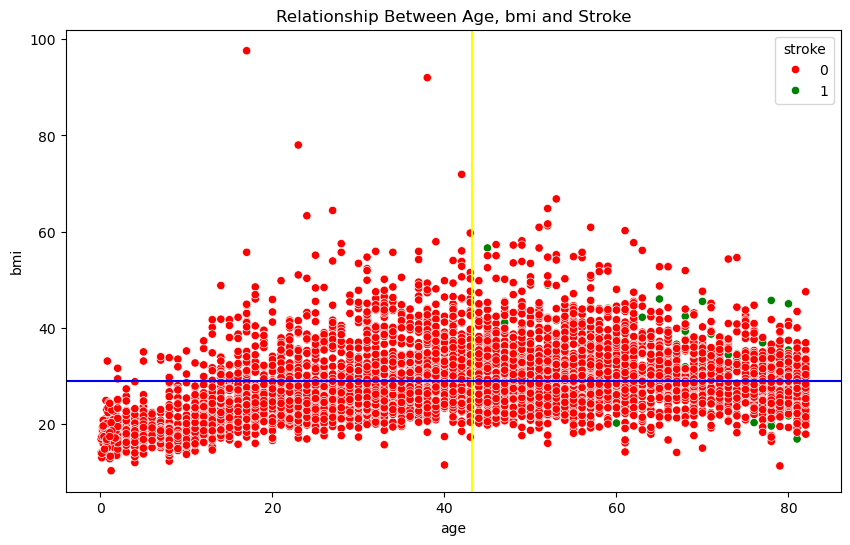

In [56]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', palette = ['red','green'], hue = 'stroke', data=health_drop)
plt.axvline(mean_age, color='yellow', linestyle='-', label=f'Mean age: {mean_age:.2f}')
plt.axhline(mean_bmi, color='blue', linestyle='-', label=f'Mean bmi: {mean_bmi:.2f}')
plt.title('Relationship Between Age, bmi and Stroke')
plt.show()